In [1]:
import pink
import tools
import numpy as np

myiter = iter(tools.DataIterator("data/radio-galaxies.bin"))

version: 2
file_type: 0
data_type: 0
number_of_images: 176750
layout: 0
dimensionality: 2
dimensions: [124 124]
size: 15376


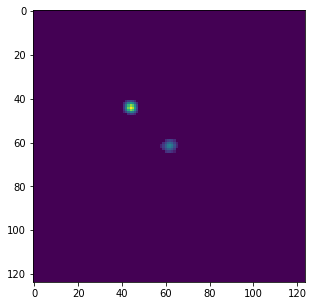

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.imshow(myiter.data)

In [3]:
import math

som_dim = 21
radius = (som_dim - 1) / 2
number_of_neurons = int(som_dim * som_dim - radius * (radius + 1))
neuron_dim = 64

print("number_of_neurons = ", number_of_neurons)
print("neuron_dim = ", neuron_dim)

np_som = np.random.rand(number_of_neurons, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som, som_layout="hexagonal-2d")

trainer = pink.Trainer(som, euclidean_distance_dim=64)

number_of_neurons =  331
neuron_dim =  64


In [4]:
from tqdm import tqdm_notebook

for image in tqdm_notebook(myiter, total=myiter.number_of_images):
    trainer(pink.Data(image))

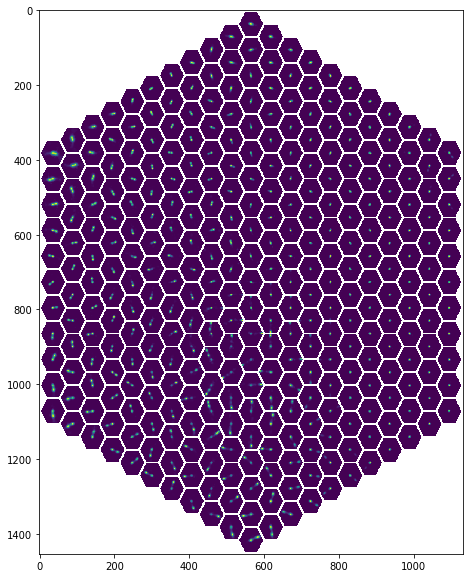

In [5]:
fig = plt.figure(figsize=(10,10))
plt.imshow(tools.show(som, border=5))